# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [2]:
import requests 
import json

cotacao = requests.get('https://economia.awesomeapi.com.br/json/all')
print(cotacao)
cotacoes_dic = cotacao.json()
print(cotacoes_dic)

<Response [200]>
{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.1797', 'low': '5.1796', 'varBid': '0.0003', 'pctChange': '0', 'bid': '5.1794', 'ask': '5.1799', 'timestamp': '1677734556', 'create_date': '2023-03-02 02:22:36'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.215', 'low': '5.215', 'varBid': '0', 'pctChange': '0', 'bid': '5.06', 'ask': '5.37', 'timestamp': '1677708003', 'create_date': '2023-03-01 19:00:03'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '3.8135', 'low': '3.8012', 'varBid': '-0.0033', 'pctChange': '-0.09', 'bid': '3.805', 'ask': '3.8068', 'timestamp': '1677740816', 'create_date': '2023-03-02 04:06:56'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '6.2347', 'low': '6.2047', 'varBid': '-0.0217', 'pctChange': '-0.35', 'bid': '6.206', 'ask': '6.2091', 'timestamp': '167

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [3]:
print('Dólar: {}'.format(cotacoes_dic['USD']['bid']))
print('Euro: {}'.format(cotacoes_dic['EUR']['bid']))
print('BitCoin: {}'.format(cotacoes_dic['BTC']['bid']))

Dólar: 5.1794
Euro: 5.5109
BitCoin: 122300


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [6]:
cotacao_dolar_30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
print(cotacao_dolar_30d)
cotacoes_dic_30d = cotacao_dolar_30d.json()
lista_cotacao_dolar = [float(item['bid']) for item in cotacoes_dic_30d]

print(lista_cotacao_dolar)

<Response [200]>
[5.1794, 5.1794, 5.2367, 5.2008, 5.2097, 5.1373, 5.1522, 5.1675, 5.1674, 5.1674, 5.1674, 5.1674, 5.2178, 5.219, 5.1923, 5.1596, 5.2151, 5.2134, 5.2911, 5.2007, 5.2101, 5.1464, 5.1522, 5.1522, 5.0504, 5.0547, 5.0731, 5.1162, 5.1089, 5.1089]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [22]:
cotacao_btc = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/300?start_date=20200101&end_date=20201031')
print(cotacao_btc)
cotacao_btc_dic = cotacao_btc.json()
lista_cotacao_btc = [float(item['bid']) for item in cotacao_btc_dic]
lista_cotacao_btc.reverse()
print(lista_cotacao_btc)



<Response [200]>
[29776.1, 29761.0, 29650.0, 31313.3, 33049.1, 32800.2, 32172.0, 33200.2, 32897.0, 33050.0, 33384.4, 36210.0, 36781.0, 36471.8, 37104.3, 37273.1, 36400.0, 36604.0, 36820.0, 36500.0, 35216.0, 35649.1, 35177.2, 35891.2, 37158.0, 38870.0, 39101.0, 39991.0, 39601.0, 39660.0, 39376.0, 40690.0, 41690.0, 42285.0, 42590.0, 43786.8, 42771.0, 44219.2, 45110.0, 44520.1, 44660.5, 43201.0, 43390.0, 42400.4, 44220.1, 42910.0, 42450.0, 42870.9, 42772.1, 43726.2, 42722.1, 41800.0, 39650.7, 40000.0, 39356.8, 39001.9, 38750.0, 40100.1, 39602.1, 40100.7, 42101.0, 42300.0, 41453.1, 38612.5, 38100.2, 37200.1, 38429.9, 25800.0, 28150.0, 27050.0, 27935.0, 25715.6, 27100.0, 27669.4, 32011.0, 31820.1, 32084.3, 30879.8, 32605.1, 34155.0, 33801.0, 33890.9, 33050.0, 32142.5, 31000.0, 33000.1, 32577.9, 33510.6, 34550.7, 35600.0, 35601.3, 35320.4, 37655.2, 37250.0, 37720.1, 37255.2, 36007.0, 36360.0, 35800.0, 35750.0, 35150.0, 37025.0, 36836.7, 37415.0, 37158.0, 36652.1, 36800.0, 38000.1, 40050.0, 4

#### Gráfico com as cotações do BitCoin

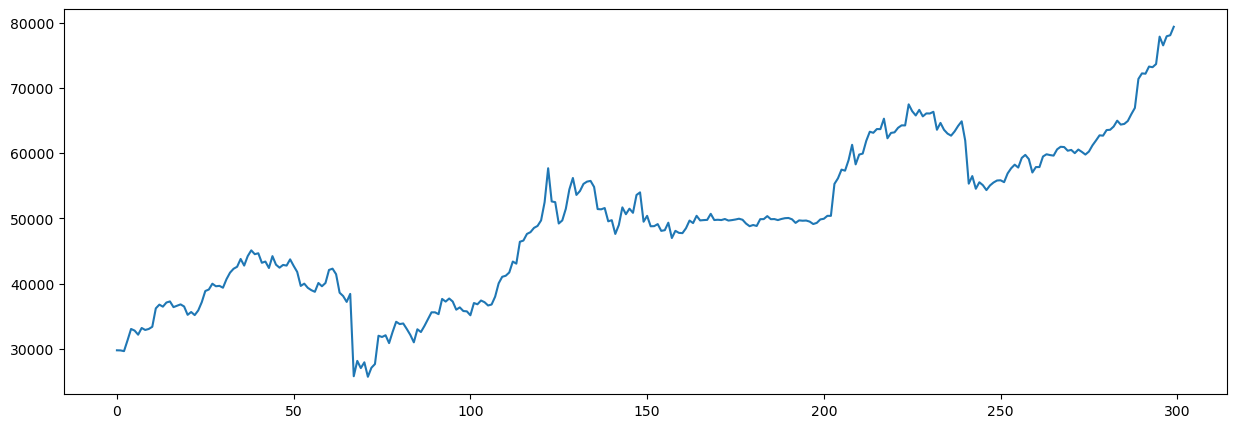

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(lista_cotacao_btc)
plt.show()